In [1]:
import os
import sys
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'input/ncaa-march-madness-2020/'
dfs = {'MEvents': [], 'Misc': {}}
for root, dirs, files in os.walk(PATH):
    for file in files:
        path = os.path.join(root, file)
        print(path)
        if bool(re.search('MEvents', path)):
            dfs['MEvents'].append(pd.read_csv(path))
            
        elif bool(re.search('.DS_Store', path)):
            pass
        
        else:
            start = path.rfind('/') + 1
            end = re.search('.csv', path).span()[0]
            if bool(re.search('MTeamSpellings', path)):
                dfs['Misc'][path[start:end]] = pd.read_csv(path, encoding='cp1252')
            else:
                dfs['Misc'][path[start:end]] = pd.read_csv(path)

input/ncaa-march-madness-2020/MEvents2018.csv
input/ncaa-march-madness-2020/.DS_Store
input/ncaa-march-madness-2020/MEvents2019.csv
input/ncaa-march-madness-2020/MPlayers.csv
input/ncaa-march-madness-2020/MSampleSubmissionStage1_2020.csv
input/ncaa-march-madness-2020/MEvents2017.csv
input/ncaa-march-madness-2020/MEvents2016.csv
input/ncaa-march-madness-2020/MEvents2015.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MNCAATourneyCompactResults.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MSeasons.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MNCAATourneySlots.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MGameCities.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MConferenceTourneyGames.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/Cities.csv
input/ncaa-march-madness-2020/MDataFiles_Stage1/MRegu

In [4]:
events = pd.concat(dfs['MEvents'], axis=0, sort=False)
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,7850408,2018,11,1104,1272,82,70,0,0,15,1104,130,made3,unk,0,0,0
1,7850409,2018,11,1104,1272,82,70,0,0,15,1104,129,assist,NaN,0,0,0
2,7850410,2018,11,1104,1272,82,70,0,0,39,1272,6242,turnover,unk,0,0,0
3,7850411,2018,11,1104,1272,82,70,0,0,43,1104,143,miss2,jump,0,0,0
4,7850412,2018,11,1104,1272,82,70,0,0,43,1104,129,reb,off,0,0,0


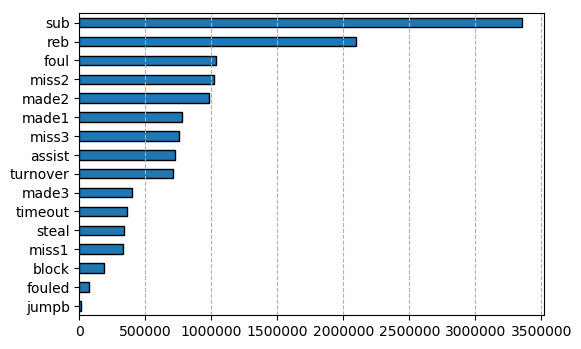

In [5]:
fig, ax = plt.subplots(dpi=100)
events['EventType'].value_counts(ascending=True).plot(kind='barh', edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
plt.show()

In [6]:
team_names = dict(dfs['Misc']['MTeams'][['TeamID', 'TeamName']].values)
events['TeamName'] = events['EventTeamID'].map(team_names)

In [7]:
win_by_year = events.groupby(by=['Season', 'TeamName'])['WTeamID'].agg(count='count')
win_by_year = win_by_year.sort_values(['Season', 'count'], ascending=[True, False])

In [8]:
win_by_year.groupby(level=[0]).head(3)

count
Season TeamName             
2015   Kentucky        10775
       VCU             10493
       North Carolina  10127
2016   G Washington    10165
       Army            10010
       West Virginia    9776
2017   West Virginia   10542
       North Carolina  10069
       Kentucky         9923
2018   Texas Tech      10524
       Prairie View     9942
       Villanova        9930
2019   Michigan St     10237
       Prairie View    10171
       UC Irvine       10043

In [9]:
events = pd.merge(events, dfs['Misc']['MPlayers'], 
                  how='left', 
                  left_on=['EventTeamID', 'EventPlayerID'], 
                  right_on=['TeamID', 'PlayerID']).drop(['TeamID', 'PlayerID'], axis=1)

In [10]:
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area,TeamName,LastName,FirstName
0,7850408,2018,11,1104,1272,82,70,0,0,15,1104,130,made3,unk,0,0,0,Alabama,Ingram,Dazon
1,7850409,2018,11,1104,1272,82,70,0,0,15,1104,129,assist,NaN,0,0,0,Alabama,Hall,Donta
2,7850410,2018,11,1104,1272,82,70,0,0,39,1272,6242,turnover,unk,0,0,0,Memphis,Martin,Jeremiah
3,7850411,2018,11,1104,1272,82,70,0,0,43,1104,143,miss2,jump,0,0,0,Alabama,Petty Jr.,John
4,7850412,2018,11,1104,1272,82,70,0,0,43,1104,129,reb,off,0,0,0,Alabama,Hall,Donta


In [11]:
events['FullName'] = events['FirstName'].str.cat(events['LastName'], sep=' ')

In [12]:
events['Area'].value_counts()

0     12830133
1        86970
2        67635
11       36436
9        34192
10       22928
4        19740
6        18551
13       16013
5         8190
12        4500
8         3441
3          490
7          465
Name: Area, dtype: int64

In [13]:
area_by_player = events.groupby(by=['Area', 'Season', 'TeamName', 'FullName'])['WTeamID'].agg(count='count')

In [14]:
area_by_player = area_by_player.sort_values(['Season', 'count'], ascending=[True, False])

In [15]:
area_by_player.loc[pd.IndexSlice[:, 2016,:,:],:]

count
Area Season TeamName       FullName                
0    2016   Oakland        Kahlil Felder       1798
            BYU            Kyle Collinsworth   1666
            North Carolina Brice Johnson       1589
            LSU            Ben Simmons         1586
            Austin Peay    Chris Horton        1583
...                                             ...
            S Illinois     Aaron Siler            1
            Stanford       Alex Seutin            1
                           Ian Proulx             1
            Stony Brook    Tim Donohoe            1
            Syracuse       Jonathan Radner        1

[4526 rows x 1 columns]

In [16]:
area_by_player.droplevel(2).head(1)

,,,count
Area,Season,FullName,
0,2015,David Laury,1582


In [17]:
area_by_player.loc[pd.IndexSlice[2,2015,:,:],:]

,,,,count
Area,Season,TeamName,FullName,


In [18]:
area_by_player.groupby(level=[0,1]).head(1)

count
Area Season TeamName       FullName                   
0    2015   Iona           David Laury            1582
     2016   Oakland        Kahlil Felder          1798
     2017   Richmond       T.J. Cline             1693
     2018   Oklahoma       Trae Young             1707
     2019   CS Northridge  Lamine Diane           1728
1    2019   Duke           Zion Williamson         231
2    2019   Wisconsin      Ethan Happ              198
11   2019   Houston        Armoni Brooks           130
9    2019   DePaul         Max Strus               126
10   2019   Purdue         Carsen Edwards          100
4    2019   St Joseph's PA Charlie Brown            70
6    2019   SMU            Jimmy Whitt Jr.          58
13   2019   Illinois       Giorgi Bezhanishvili     38
5    2019   CS Bakersfield Jarkel Joiner            33
8    2019   Houston        Cedrick Alley Jr.        31
12   2019   Murray St      Tevin Brown              26
3    2019   Detroit        Antoine Davis             9
7    2019   CS Bakersfield Jarkel Joiner             6

In [19]:
# idx = pd.IndexSlice
# dfmi.loc[idx[:, 'B0':'B1'], :]

In [20]:
win_by_year.groupby(level=0).head(1)

,,count
Season,TeamName,
2015,Kentucky,10775
2016,G Washington,10165
2017,West Virginia,10542
2018,Texas Tech,10524
2019,Michigan St,10237


In [21]:
dfs['Misc']['MGameCities'].head()

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080
3,2010,7,1393,1107,Regular,4340
4,2010,9,1143,1178,Regular,4027


In [22]:
dfs['Misc'].keys()

dict_keys(['MPlayers', 'MSampleSubmissionStage1_2020', 'MNCAATourneyDetailedResults', 'MNCAATourneyCompactResults', 'MSeasons', 'MRegularSeasonDetailedResults', 'MNCAATourneySlots', 'MGameCities', 'MConferenceTourneyGames', 'Cities', 'MRegularSeasonCompactResults', 'MNCAATourneySeedRoundSlots', 'MTeamConferences', 'MTeamCoaches', 'MMasseyOrdinals', 'Conferences', 'MTeams', 'MNCAATourneySeeds', 'MSecondaryTourneyTeams', 'MTeamSpellings', 'MSecondaryTourneyCompactResults'])

In [23]:
dfs['Misc']['MNCAATourneyDetailedResults'].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [24]:
dfs['Misc']['MNCAATourneyCompactResults'].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [25]:
dfs['Misc']['MSeasons'].head() # 읆느아ㅣㅡ

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [26]:
dfs['Misc']['MRegularSeasonDetailedResults'].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [27]:
dfs['Misc']['MNCAATourneySlots'].head()

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


In [28]:
dfs['Misc']['MGameCities'].head()

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080
3,2010,7,1393,1107,Regular,4340
4,2010,9,1143,1178,Regular,4027


In [29]:
dfs['Misc']['MConferenceTourneyGames'].head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273


In [30]:
dfs['Misc']['Cities'].head()

,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA


In [31]:
dfs['Misc']['MRegularSeasonCompactResults'].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [32]:
dfs['Misc']['MNCAATourneySeedRoundSlots'].head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


In [33]:
dfs['Misc']['MTeamConferences'].head()

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac


In [34]:
dfs['Misc']['Conferences'].head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [35]:
dfs['Misc']['MMasseyOrdinals'].head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [36]:
dfs['Misc']['MTeams'].head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020


In [37]:
dfs['Misc']['MNCAATourneySeeds'].head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [38]:
dfs['Misc']['MSecondaryTourneyTeams'].head()

,Season,SecondaryTourney,TeamID
0,1985,NIT,1108
1,1985,NIT,1133
2,1985,NIT,1139
3,1985,NIT,1145
4,1985,NIT,1151


In [39]:
dfs['Misc']['MTeamSpellings'].head()

,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101
3,abilene christian,1101
4,abilene-christian,1101


In [40]:
dfs['Misc']['MTeamSpellings'].head()

,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101
3,abilene christian,1101
4,abilene-christian,1101


In [41]:
dfs['Misc']['MSecondaryTourneyCompactResults'].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT
3,1985,136,1231,79,1139,57,H,0,NIT
4,1985,136,1249,78,1222,71,H,0,NIT


In [42]:
area_names = {
    0: np.nan,
    1: 'under basket',
    2: 'in the paint',
    3: 'inside right wing',
    4: 'inside right',
    5: 'inside center',
    6: 'inside left',
    7: 'inside left wing',
    8: 'outside right wing',
    9: 'outside right',
    10: 'outside center',
    11: 'outside left',
    12: 'outside left wing',
    13: 'backcourt'
}

In [45]:
events['AreaName'] = events['Area'].map(area_names)

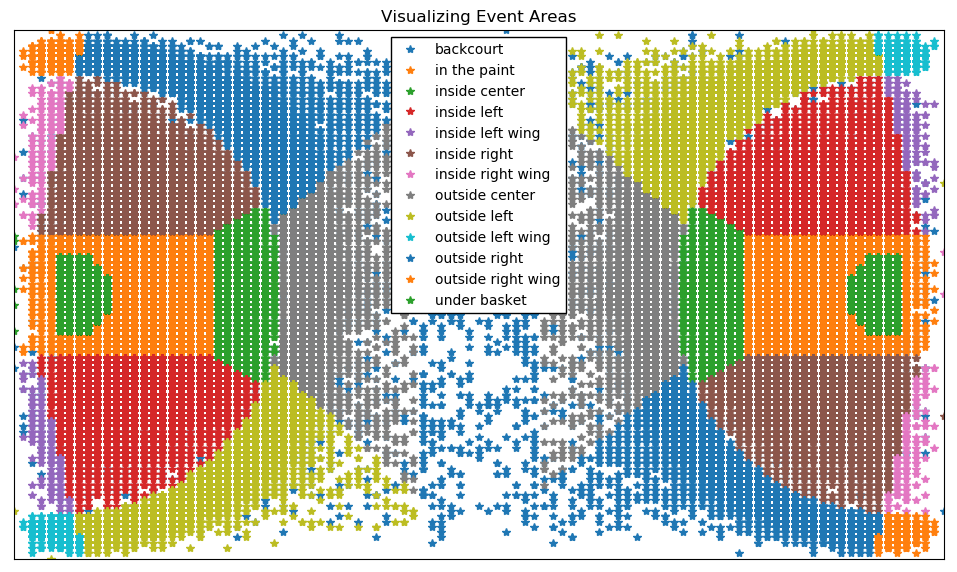

In [86]:
fig, ax = plt.subplots(figsize=(12,7), dpi=100)
for area, df in events.loc[~events['AreaName'].isna()].groupby('AreaName'):
    df.plot(x='X', y='Y', style='*', label=area, ax=ax, title='Visualizing Event Areas')

    
ax.legend(frameon=True, framealpha=1, shadow=False, 
          fancybox=False, edgecolor='black', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()

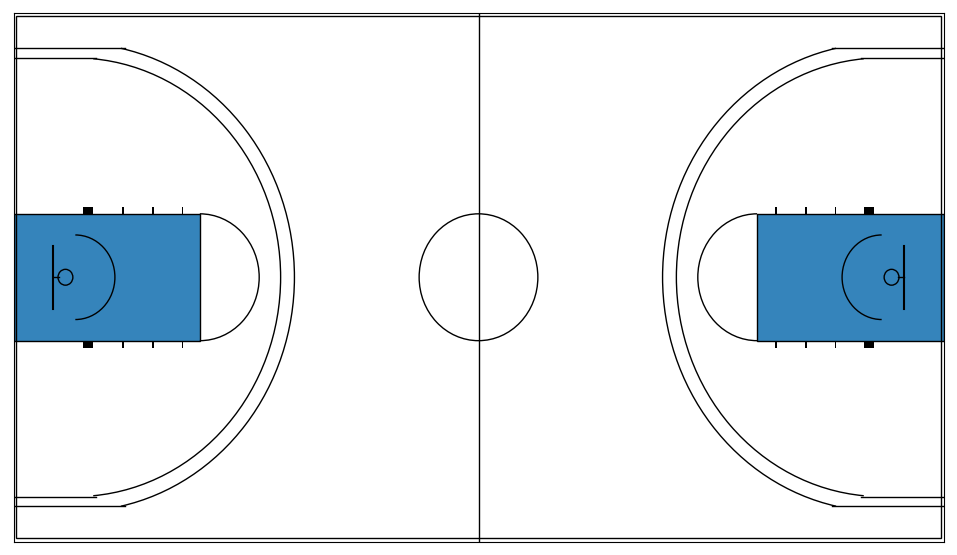

In [114]:
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns

court_color='#dfbb85'
def create_ncaa_full_court(ax=None, three_line='mens', court_color='white',
                           lw=1, lines_color='black', lines_alpha=1.0,
                           paint_fill='blue', paint_alpha=1.0):
    """
    Creates NCAA Basketball
    Dimensions are in feet (Court is 97x50 ft)
    Created by: Rob Mulla / https://github.com/RobMulla
    http://savvastjortjoglou.com/nba-play-by-play-movements.html

    * Note that this function uses "feet" as the unit of measure.
    * NCAA Data is provided on a x range: 0, 100 and y-range 0 to 100
    * To plot X/Y positions first convert to feet like this:
    ```
    Events['X_'] = (Events['X'] * (94/100))
    Events['Y_'] = (Events['Y'] * (50/100))
    ```

    three_line: 'mens', 'womens' or 'both' defines 3 point line plotted
    court_color : (hex) Color of the court
    lw : line width
    lines_color : Color of the lines
    paint_fill : Color inside the paint
    paint_alpha : transparency of the "paint"
    """
    if ax is None:
        ax = plt.gca()

    # Create Pathes for Court Lines
    center_circle = Circle((94/2, 50/2), 6,
                           linewidth=lw, color=lines_color, lw=lw,
                           fill=False, alpha=lines_alpha)
#     inside_circle = Circle((94/2, 50/2), 2,
#                            linewidth=lw, color=lines_color, lw=lw,
#                            fill=False, alpha=lines_alpha)

    hoop_left = Circle((5.25, 50/2), 1.5 / 2,
                       linewidth=lw, color=lines_color, lw=lw,
                       fill=False, alpha=lines_alpha)
    hoop_right = Circle((94-5.25, 50/2), 1.5 / 2,
                        linewidth=lw, color=lines_color, lw=lw,
                        fill=False, alpha=lines_alpha)

    # Paint - 18 Feet 10 inches which converts to 18.833333 feet - gross!
    left_paint = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=paint_fill, alpha=paint_alpha,
                           lw=lw, edgecolor=None)
    right_paint = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=paint_fill, alpha=paint_alpha,
                            lw=lw, edgecolor=None)
    
    left_paint_boarder = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=False, alpha=lines_alpha,
                           lw=lw, edgecolor=lines_color)
    right_paint_boarder = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=False, alpha=lines_alpha,
                            lw=lw, edgecolor=lines_color)

    left_arc = Arc((18.833333, 50/2), 12, 12, theta1=-
                   90, theta2=90, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    right_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=90,
                    theta2=-90, color=lines_color, lw=lw,
                    alpha=lines_alpha)
    
    leftblock1 = Rectangle((7, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    leftblock2 = Rectangle((7, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(leftblock1)
    ax.add_patch(leftblock2)
    
    left_l1 = Rectangle((11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l2 = Rectangle((14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l3 = Rectangle((17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l1)
    ax.add_patch(left_l2)
    ax.add_patch(left_l3)
    left_l4 = Rectangle((11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l5 = Rectangle((14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l6 = Rectangle((17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l4)
    ax.add_patch(left_l5)
    ax.add_patch(left_l6)
    
    rightblock1 = Rectangle((94-7-1, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    rightblock2 = Rectangle((94-7-1, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(rightblock1)
    ax.add_patch(rightblock2)

    right_l1 = Rectangle((94-11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l2 = Rectangle((94-14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l3 = Rectangle((94-17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l1)
    ax.add_patch(right_l2)
    ax.add_patch(right_l3)
    right_l4 = Rectangle((94-11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l5 = Rectangle((94-14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l6 = Rectangle((94-17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l4)
    ax.add_patch(right_l5)
    ax.add_patch(right_l6)
    
    # 3 Point Line
    if (three_line == 'mens') | (three_line == 'both'):
        # 22' 1.75" distance to center of hoop
        three_pt_left = Arc((6.25, 50/2), 44.291, 44.291, theta1=-78,
                            theta2=78, color=lines_color, lw=lw,
                            alpha=lines_alpha)
        three_pt_right = Arc((94-6.25, 50/2), 44.291, 44.291,
                             theta1=180-78, theta2=180+78,
                             color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 feet max to sideline for mens
        ax.plot((0, 11.25), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 11.25), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt_left)
        ax.add_patch(three_pt_right)

    if (three_line == 'womens') | (three_line == 'both'):
        # womens 3
        three_pt_left_w = Arc((6.25, 50/2), 20.75 * 2, 20.75 * 2, theta1=-85,
                              theta2=85, color=lines_color, lw=lw, alpha=lines_alpha)
        three_pt_right_w = Arc((94-6.25, 50/2), 20.75 * 2, 20.75 * 2,
                               theta1=180-85, theta2=180+85,
                               color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 inches max to sideline for mens
        ax.plot((0, 8.3), (4.25, 4.25), color=lines_color,
                lw=lw, alpha=lines_alpha)
        ax.plot((0, 8.3), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (4.25, 4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_left_w)
        ax.add_patch(three_pt_right_w)

    # Add Patches
    ax.add_patch(left_paint)
    ax.add_patch(left_paint_boarder)
    ax.add_patch(right_paint)
    ax.add_patch(right_paint_boarder)
    ax.add_patch(center_circle)
#     ax.add_patch(inside_circle)
    ax.add_patch(hoop_left)
    ax.add_patch(hoop_right)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    # Restricted Area Marker
    restricted_left = Arc((6.25, 50/2), 8, 8, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha)
    restricted_right = Arc((94-6.25, 50/2), 8, 8,
                         theta1=180-90, theta2=180+90,
                         color=lines_color, lw=lw, alpha=lines_alpha)
    ax.add_patch(restricted_left)
    ax.add_patch(restricted_right)
    
    # Backboards
    ax.plot((4, 4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((94-4, 94-4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((4, 4.6), (50/2, 50/2), color=lines_color,
            lw=lw, alpha=lines_alpha)
    ax.plot((94-4, 94-4.6), (50/2, 50/2),
            color=lines_color, lw=lw, alpha=lines_alpha)

    # Half Court Line
    ax.axvline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    # Boarder
    boarder = Rectangle((0.3,0.3), 94-0.6, 50-0.6, fill=False, lw=1, color='black', alpha=lines_alpha)
    ax.add_patch(boarder)
    
    # Plot Limit
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    
    return ax


fig, ax = plt.subplots(figsize=(12,7), dpi=100)
create_ncaa_full_court(ax, three_line='both', paint_alpha=0.9)
plt.show()

In [112]:
# Normalize X, Y positions for court dimentions
# Court is 50 feet wide and 94 feet end to end.
events['NormX'] = (events['X'] * (94/100))
events['NormY'] = (events['Y'] * (50/100))

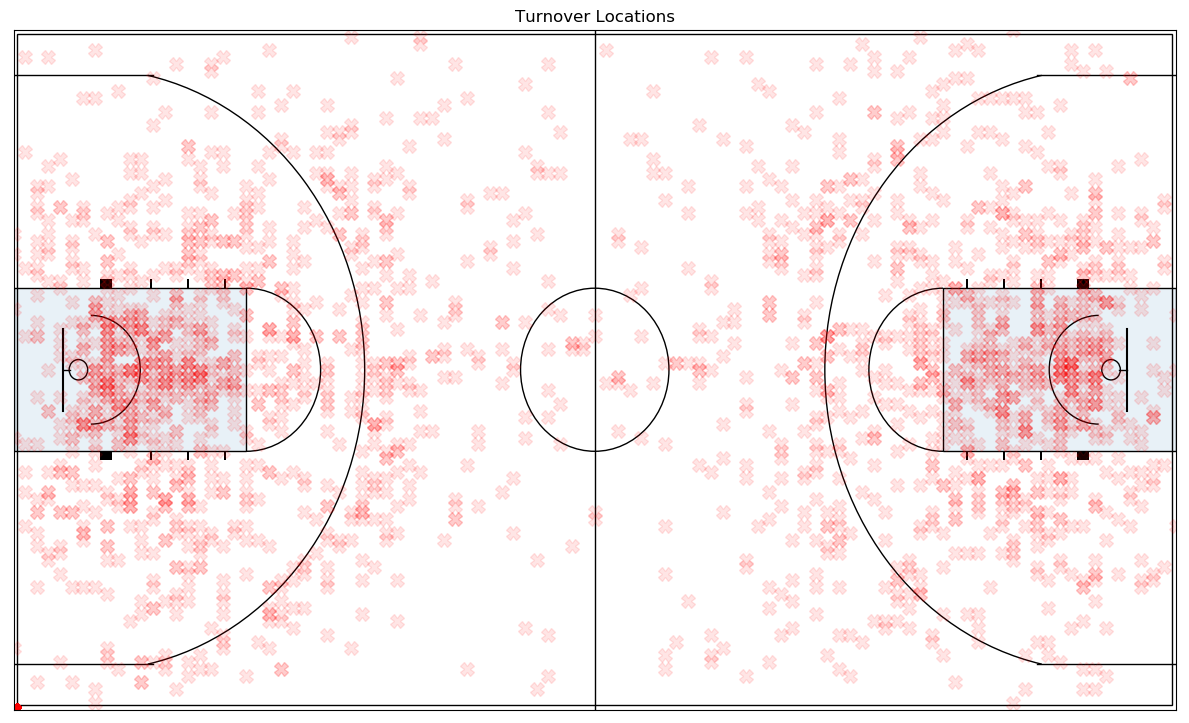

In [113]:
fig, ax = plt.subplots(figsize=(12,7), dpi=100)
ms = 10
ax = create_ncaa_full_court(ax, paint_alpha=0.1)
events.query('EventType == "turnover"') \
    .plot(x='NormX', y='NormY', style='X',
          title='Turnover Locations',
          c='red',
          alpha=0.1,
         figsize=(15, 9),
         label='Steals',
         ms=ms,
         ax=ax)
ax.set_xlabel('')
ax.get_legend().remove()
plt.show()

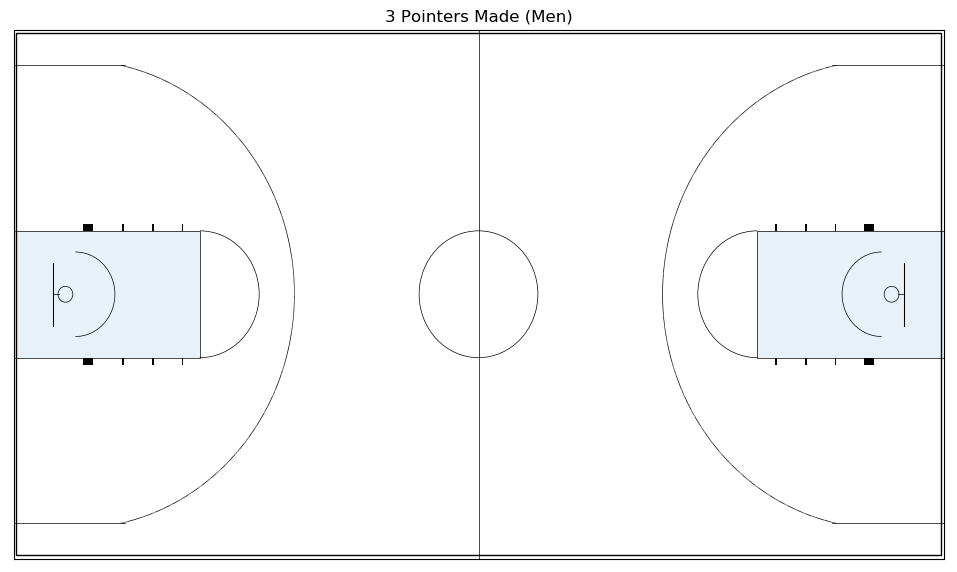

In [115]:
# COURT_COLOR = '#dfbb85'
COURT_COLOR = 'white'
fig, ax = plt.subplots(figsize=(12,7), dpi=100)
# Where are 3 pointers made from? (This is really cool)
events.query('EventType == "made3"') \
    .plot(x='NormX', y='NormY', style='.',
          color='white', # color='blue'
          title='3 Pointers Made (Men)',
          alpha=0.01, ax=ax)

ax = create_ncaa_full_court(ax, lw=0.5, three_line='mens', paint_alpha=0.1)
ax.set_facecolor(COURT_COLOR)
ax.get_legend().remove()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
plt.show()

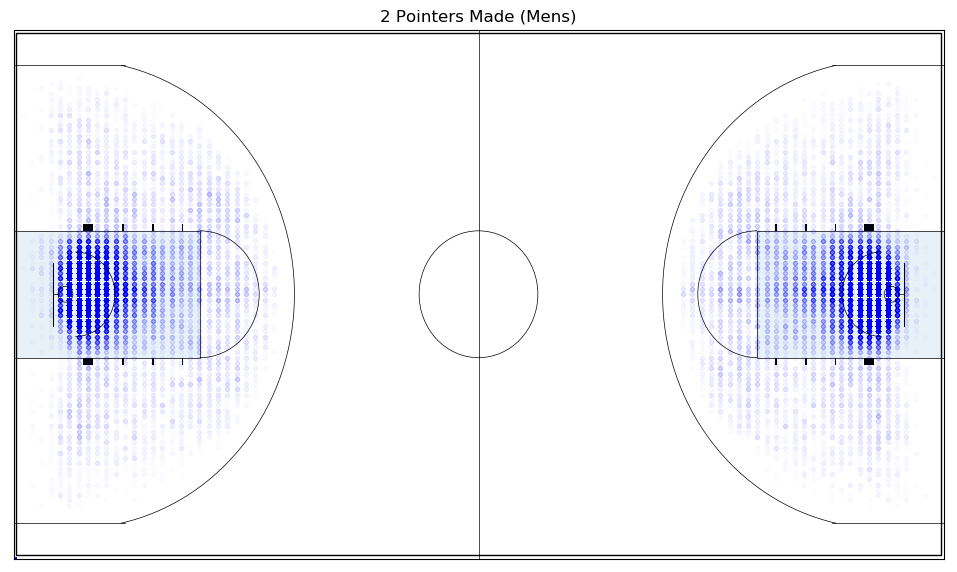

In [121]:
# COURT_COLOR = '#dfbb85'
COURT_COLOR = 'white'
fig, ax = plt.subplots(figsize=(12,7), dpi=100)
# Where are 3 pointers made from? (This is really cool)
events.query('EventType == "made2"') \
    .plot(x='NormX', y='NormY', style='.',
          color='blue',
          title='2 Pointers Made (Mens)',
          alpha=0.01, ax=ax)

ax.set_facecolor(COURT_COLOR)
ax = create_ncaa_full_court(ax, lw=0.5, three_line='mens', paint_alpha=0.1)

ax.get_legend().remove()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
plt.show()

In [109]:
def plot_player_shots(playerid=None, name=None, made3=True,
                      miss3=True, ):
    """
    PlayerID : Provide playerid
    Name (tuple): (firstname, lastname) - provide if no playerid provided
    made3: Include Made 3
    """
    # TODO - Finish this function

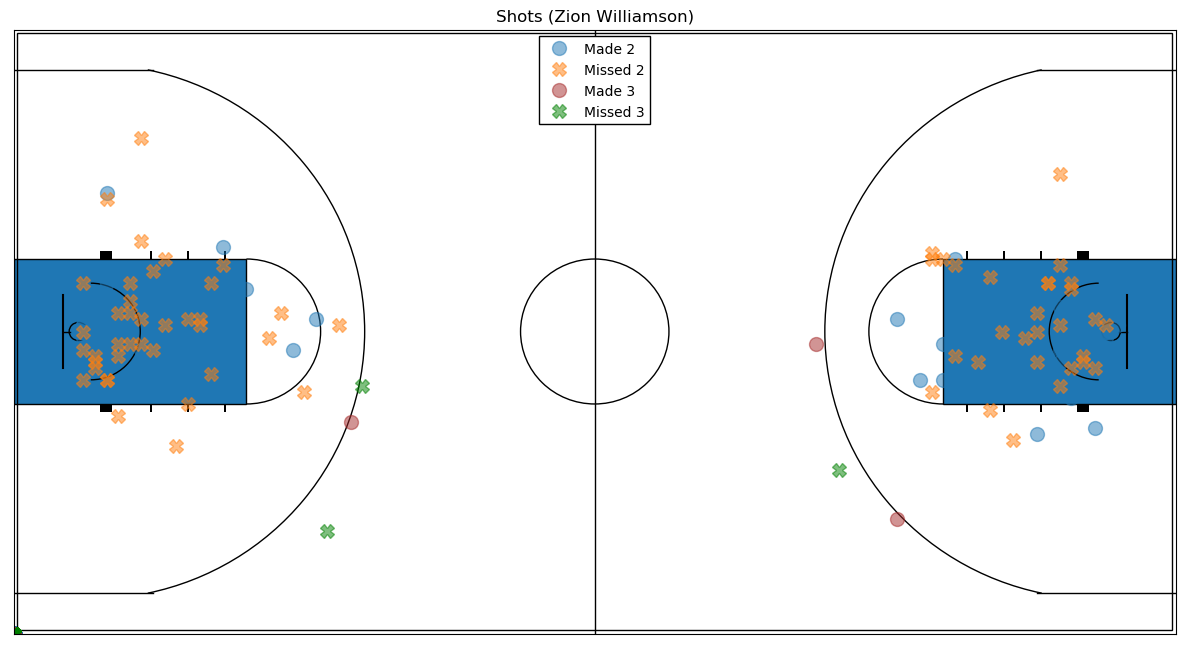

In [129]:
ms = 10 # Marker Size
FullName = 'Zion Williamson'
FullName = 'Lamine Diane'

fig, ax = plt.subplots(figsize=(12,7), dpi=100)
ax = create_ncaa_full_court(ax)
events.query('FullName == @FullName and EventType == "made2"') \
    .plot(x='NormX', y='NormY', style='o',
          title='Shots (Zion Williamson)',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 2',
         ms=ms,
         ax=ax)
plt.legend()
events.query('FullName == @FullName and EventType == "miss2"') \
    .plot(x='NormX', y='NormY', style='X',
          alpha=0.5, ax=ax,
         label='Missed 2',
         ms=ms)
plt.legend()
events.query('FullName == @FullName and EventType == "made3"') \
    .plot(x='NormX', y='NormY', style='o',
          c='brown',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 3', ax=ax,
         ms=ms)
plt.legend()
events.query('FullName == @FullName and EventType == "miss3"') \
    .plot(x='NormX', y='NormY', style='X',
          c='green',
          alpha=0.5, ax=ax,
         label='Missed 3',
         ms=ms)
ax.set_xlabel('')
ax.legend(frameon=True, framealpha=1, shadow=False, 
          fancybox=False, edgecolor='black', loc='upper center')
plt.show()

In [130]:
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,...,X,Y,Area,TeamName,LastName,FirstName,FullName,AreaName,NormX,NormY
0,7850408,2018,11,1104,1272,82,70,0,0,15,...,0,0,0,Alabama,Ingram,Dazon,Dazon Ingram,NaN,0.0,0.0
1,7850409,2018,11,1104,1272,82,70,0,0,15,...,0,0,0,Alabama,Hall,Donta,Donta Hall,NaN,0.0,0.0
2,7850410,2018,11,1104,1272,82,70,0,0,39,...,0,0,0,Memphis,Martin,Jeremiah,Jeremiah Martin,NaN,0.0,0.0
3,7850411,2018,11,1104,1272,82,70,0,0,43,...,0,0,0,Alabama,Petty Jr.,John,John Petty Jr.,NaN,0.0,0.0
4,7850412,2018,11,1104,1272,82,70,0,0,43,...,0,0,0,Alabama,Hall,Donta,Donta Hall,NaN,0.0,0.0


In [136]:
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,...,X,Y,Area,TeamName,LastName,FirstName,FullName,AreaName,NormX,NormY
0,7850408,2018,11,1104,1272,82,70,0,0,15,...,0,0,0,Alabama,Ingram,Dazon,Dazon Ingram,NaN,0.0,0.0
1,7850409,2018,11,1104,1272,82,70,0,0,15,...,0,0,0,Alabama,Hall,Donta,Donta Hall,NaN,0.0,0.0
2,7850410,2018,11,1104,1272,82,70,0,0,39,...,0,0,0,Memphis,Martin,Jeremiah,Jeremiah Martin,NaN,0.0,0.0
3,7850411,2018,11,1104,1272,82,70,0,0,43,...,0,0,0,Alabama,Petty Jr.,John,John Petty Jr.,NaN,0.0,0.0
4,7850412,2018,11,1104,1272,82,70,0,0,43,...,0,0,0,Alabama,Hall,Donta,Donta Hall,NaN,0.0,0.0


In [149]:
# events.query('TeamName == "Duke"')

In [151]:
events.query('WTeamID == 1181 and Season == 2019').groupby(by=['DayNum'])[['WTeamID', 'LTeamID']].agg('count').shape

(32, 2)

In [150]:
events.query('LTeamID == 1181 and Season == 2019').groupby(by=['DayNum'])[['WTeamID', 'LTeamID']].agg('count').shape

(6, 2)

In [158]:
ranks = {'team': [], 'win': [], 'lose': []}
for team_id, team_name in team_names.items():
    ranks['team'].append(team_name)
    ranks['win'].append(events.query('WTeamID == @team_id and Season == 2019').groupby(by=['DayNum'])['WTeamID'].agg('count').shape[0])
    ranks['lose'].append(events.query('LTeamID == @team_id and Season == 2019').groupby(by=['DayNum'])['LTeamID'].agg('count').shape[0])

In [161]:
ranks = pd.DataFrame(ranks)

In [170]:
ranks['diff'] = ranks['lose'] / ranks['win']

In [173]:
ranks.sort_values('diff', ascending=True).head(10)

,team,win,lose,diff
337,Virginia,34,3,0.088235
110,Gonzaga,33,4,0.121212
121,Houston,33,4,0.121212
37,Buffalo,31,4,0.129032
204,Nevada,29,5,0.172414
207,New Mexico St,28,5,0.178571
358,Wofford,27,5,0.185185
80,Duke,32,6,0.187500
192,Murray St,26,5,0.192308
302,Texas Tech,31,6,0.193548
